## 加载数据

In [1]:
import pandas as pd

# 1. 数据加载
data = pd.read_csv('conversion_data.csv')
data

,Temperature,Pressure,Conversion_Rate
0,124.871233,2.666196,30.014642
1,286.200006,5.877109,80.529752
2,224.958304,8.856513,69.650958
3,187.624376,7.590024,63.755980
4,63.685219,8.259050,32.370937
...,...,...,...
995,45.642981,6.912596,11.501452
996,276.847801,9.609532,98.072939
997,58.309217,1.620622,39.187504
998,286.066459,1.513492,70.716851


## 可视化原始数据

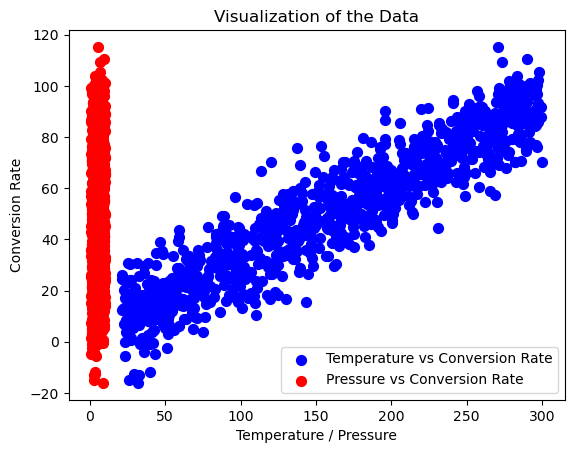

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 从CSV文件读取数据
data = pd.read_csv('conversion_data.csv')
temperatures = data['Temperature'].values
pressures = data['Pressure'].values
conversion_rates = data['Conversion_Rate'].values

# 可视化数据点
plt.scatter(temperatures, conversion_rates, color='blue', s=50, label='Temperature vs Conversion Rate')
plt.scatter(pressures, conversion_rates, color='red', s=50, label='Pressure vs Conversion Rate')
plt.xlabel('Temperature / Pressure')
plt.ylabel('Conversion Rate')
plt.legend()
plt.title('Visualization of the Data')
plt.show()


## 机器学习

Results for k=1:
Mean Squared Error: 187.4864967268772
------------------------------------------------------
Results for k=3:
Mean Squared Error: 123.95439075623145
------------------------------------------------------
Results for k=5:
Mean Squared Error: 118.03987268820272
------------------------------------------------------
Results for k=7:
Mean Squared Error: 111.3765461518417
------------------------------------------------------
Results for k=9:
Mean Squared Error: 107.42337719635587
------------------------------------------------------
Results for k=11:
Mean Squared Error: 103.76466440660371
------------------------------------------------------
Results for k=13:
Mean Squared Error: 101.58501524215846
------------------------------------------------------
Results for k=15:
Mean Squared Error: 99.92980067590653
------------------------------------------------------
The best k value is: 15 with minimum MSE: 99.92980067590653


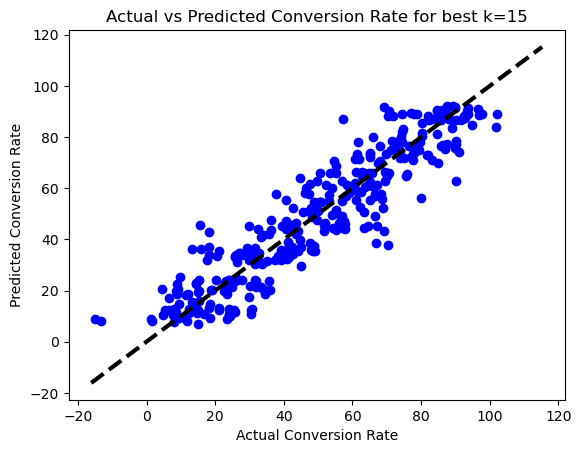

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 分割数据为训练集和测试集
X = data[['Temperature', 'Pressure']].values
y = conversion_rates
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

k_values = [1, 3, 5, 7, 9, 11, 13, 15]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    print(f"Results for k={k}:")
    print("Mean Squared Error:", mse)
    print("------------------------------------------------------")

# 选择MSE最小的k值
best_k = k_values[mse_values.index(min(mse_values))]
print(f"The best k value is: {best_k} with minimum MSE: {min(mse_values)}")

# 使用最优的k值进行可视化
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

plt.scatter(y_test, y_pred_best, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual Conversion Rate')
plt.ylabel('Predicted Conversion Rate')
plt.title(f'Actual vs Predicted Conversion Rate for best k={best_k}')
plt.show()